In [1]:
import pandas as pd; pd.options.display.max_rows = 500
from pandasql import sqldf

import numpy as np
from scipy import stats
from scipy.stats import mstats
from __future__ import division

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set(style="whitegrid", color_codes=True)
from mpl_toolkits.mplot3d import Axes3D


import view.config as cfg
import view.storage as st
import view.normalization as norm
import view.analyze as ana
import view.wrangler as wg
import view.sql_requests as rq

from IPython.core.display import HTML
from IPython.display import display

import pydocumentdb.documents as documents
import pydocumentdb.document_client as document_client
import pydocumentdb.errors as errors
import pydocumentdb.http_constants as http_constants

import urllib3; urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

import types
import itertools

from workalendar.europe import France; calendar = France()
import docx
import openpyxl


In [37]:
config = {
    "HOST" : cfg.settings.host,
    "MASTER_KEY" : cfg.settings.master_key,
    "DATABASE_ID" : cfg.settings.database_id,
    "COLLECTION_ID" : cfg.settings.collection_id,
    "PROCEDURE_ID" : "ReadResources",
    "index" : ['start_date','end_date','resource','direction','PP','alert','downgraded']
}

results_filename = ".\Rapports_Etude_MA\Relation_Alert_Prix_MA\Results\Population_Independance.xlsx"

res_names = ["imbalance_data", "insufficients_offers", "prices", "peak_daily_margins", "signals",
             "volumes_per_energy_type","procured_reserves", "accepted_offers"]

options = { 
    "enableScriptLogging": True}
params = {
    "resources": res_names, 
    "start": "2016-01-01T00:00:00+02:00",
    "end": "2017-12-31T23:30:00+01:00",
    "options" : {
        "pageSize":50,
        "enableScan" : True,
        "continuation": None
    }
}

df = wg.GetMarket(config, params, options)

|==12752==||==10602==||==9371==||==9369==||==9376==||==9343==||==9353==||==9358==||==9358==||==9352==||==9350==||==9353==||==9358==||==9361==||==9355==||==9356==||==9361==||==9355==||==9355==||==9363==||==9357==||==9363==||==9356==||==334824==|
|==635146==||==634505==||==635250==||==637005==|
|==637005==||==635559==||==637083==||==640284==|
|==640284==||==643598==||==638623==||==641377==|
|==641377==||==641275==||==641129==||==1396099==|
|==1396099==||==1718208==|
|==1718208==||==1718655==|
|==1718655==||==1265434==|
|==1265434==||==1718071==|
|==1718071==||==1716728==|
|==1716728==||==1718975==|
|==1718975==||==1717748==|
|==1717748==||==1719167==|
|==1719167==||==1717207==|
|==1717207==||==1716557==|
|==1716557==||==1716918==|
|==1716918==||==1713495==|
|==1713495==||==1032179==|
|==1032179==||==7051==||==7051==||==7051==||==7051==||==7051==||==7043==||==7047==||==7051==||==7051==||==7051==||==7050==||==7040==||==473537==|
|==380079==||==382365==||==380889==||==379751==||==380866==||

In [36]:
df

,classification,count,freq,hue,top,value_type
0,Classification_max,2,2,PP,False,available_value
1,Classification_max,5,5,alert,False,available_value
2,Classification_max,12,11,downgraded,False,available_value
3,Classification_max,0,-,PP,-,countertrading_xb_redispatching_exported_volume
4,Classification_max,3,3,alert,True,countertrading_xb_redispatching_exported_volume
5,Classification_max,1,1,downgraded,True,countertrading_xb_redispatching_exported_volume
6,Classification_max,1,1,PP,False,countertrading_xb_redispatching_imported_volume
7,Classification_max,2,2,alert,True,countertrading_xb_redispatching_imported_volume
8,Classification_max,20,17,downgraded,True,countertrading_xb_redispatching_imported_volume
9,Classification_max,0,-,PP,-,deltap_volume


In [3]:
stu = df
stu["plage"] = stu.index.get_level_values("start_date").astype(np.datetime64).hour
stu.plage = stu.plage.map({
    0:"plage1", 1:"plage1", 2:"plage1", 3:"plage1", 4:"plage1", 5:"plage1",
    6:"plage2", 7:"plage2", 8:"plage2", 9:"plage2", 10:"plage2",
    11:"plage3", 12:"plage3", 13:"plage3",
    14:"plage4", 15:"plage4", 16:"plage4",
    17:"plage5", 18:"plage5", 19:"plage5", 
    20:"plage6", 21:"plage6", 22:"plage6", 23:"plage6"
})
stu["bday"] = pd.Series(stu.reset_index().start_date.astype(np.datetime64).apply(lambda x: calendar.is_working_day(x))).values
stu["month"] = stu.index.get_level_values("start_date").astype(np.datetime64).month
stu["quarter"] = stu.month.map({
    1:"q1", 2:"q1", 3:"q1", 
    4:"q2", 5:"q2", 6:"q2", 
    7:"q3", 8:"q3", 9:"q3", 
    10:"q4", 11:"q4", 12:"q4"
})
sto = stu.reset_index()

In [11]:
def MultipleFilter(df, selection):
    """Filter a dataframe with multiple values. 
    /!\ 0..1 value per index level not more
    
    :Parameters:
        -`df`: pandas.DataFrame
        -`selection`: list
        
    :Returns:
        Multi Index pandas.DataFrame
    """
    index_names = df.index.names
    for item in selection:
        df = df.filter(like=item, axis = 0)
        if df.shape[1] == 0:
            break
    df = df.reset_index().set_index(index_names)
    return df

def kruskal(df, groups ,kurkeys, x, alpha):
    """Apply a kruskal test on a pandas.DataFrame with a classifiaction stored in groups as paur key/list of index. kurkeys contains the list of the possible keys. x is the name of the variable on which we are doing a distribution test. alpha the statistic primary failure.
    
    :Parameters:
        -`df` : pandas.DataFrame
        -`groups`: pandas.groupby
        -`kurkeys`: list
        -`x`: string
        -`alpha`: float
    :Returns:
        dict
    """
    results = {}
    try:
        if groups != None:
            if kurkeys.shape[0] == 2:
                _, p = scipy.stats.kruskal(
                    df.loc[groups[kurkeys[0]],x],
                    df.loc[groups[kurkeys[1]],x])

            elif kurkeys.shape[0] == 3:
                _, p = scipy.stats.kruskal(
                    df.loc[groups[kurkeys[0]],x],
                    df.loc[groups[kurkeys[1]],x],
                    df.loc[groups[kurkeys[2]],x]) 

        if p:
            results = {"kruskal" : p > alpha}
    except Exception as ex:
        if False:
            print ex
    
    return results
          
def mannwhitneyu(df, groups ,kurkeys, x, alpha):
    """Apply a Mann Whitney test on a pandas.DataFrame with a classifiaction stored in groups as paur key/list of index. kurkeys contains the list of the possible keys. x is the name of the variable on which we are doing a distribution test. alpha the statistic primary failure.
    
    :Parameters:
        -`df` : pandas.DataFrame
        -`groups`: pandas.groupby
        -`kurkeys`: list
        -`x`: string
        -`alpha`: float
    :Returns:
        dict
    """
    results = {}
    p = []
    try:
        if groups != None:

            if kurkeys.shape[0] == 2:

                p.append(scipy.stats.mannwhitneyu(
                    df.loc[groups[kurkeys[0]],x],
                    df.loc[groups[kurkeys[1]],x]).pvalue)

            elif kurkeys.shape[0] == 3:
                p.append(scipy.stats.mannwhitneyu(
                    df.loc[groups[kurkeys[0]],x],
                    df.loc[groups[kurkeys[1]],x]).pvalue)
                p.append(scipy.stats.mannwhitneyu(
                    df.loc[groups[kurkeys[0]],x],
                    df.loc[groups[kurkeys[2]],x]).pvalue)
                p.append(scipy.stats.mannwhitneyu(
                    df.loc[groups[kurkeys[1]],x],
                    df.loc[groups[kurkeys[2]],x]).pvalue)

        if p != []:
            results = {"mannwhitneyu" : all(i >= alpha for i in p)}
    except Exception as ex:
        if False:
            print ex
    
    
    return results

def norlmaltest(df, x, alpha, stamp):
    """Apply a normal test on a pandas.DataFrame.  is the name of the variable on which we are doing a distribution test. alpha the statistic primary failure.
    
    :Parameters:
        -`df` : pandas.DataFrame
        -`x`: string
        -`alpha`: float
    :Returns:
        dict
    """
    
    results = {}
    if df.shape[0] > 8:
        results = {"normal_"+stamp : scipy.stats.normaltest(df[x]).pvalue > alpha }
    
    return results

def dfstats(df, hues, value, alpha):
    """Apply kruskal, Mann Whitney and normal test on a pandas.DataFrame. Hues is a list of classification on which we want to all the tests. Value is the name of the value on which we are doing the test and alpha the statistic primary failure.
    
    :Parameters:
        -`df` : pandas.DataFrame
        -`hues` : list
        -`value`: string
        -`alpha`: float
    :Returns:
        pandas.DataFrame
    """
    results = []
    
    for hue in hues:
        if not df.empty:
            kurkeys = np.asarray(sorted(df[hue].unique()))
            grouped = df.groupby(hue)
            groups = grouped.groups if kurkeys.shape[0] > 1 else None
                        
            if groups != None:
                
                dic = {
                    'hue': hue,
                }
                dic.update(mannwhitneyu(df, groups ,kurkeys, value, alpha))
                dic.update(kruskal(df, groups ,kurkeys, value, alpha))
                dic.update(norlmaltest(df[df[hue] != "NORMAL"], value, alpha, 'tension'))
                dic.update(norlmaltest(df[df[hue] == "NORMAL"], value, alpha, 'normal'))
                dic.update(df.describe().value)
                results.append(dic)
    
    sub_df = pd.DataFrame(results)          
    return sub_df if results != [] else None

In [24]:
des = []
writer = pd.ExcelWriter(".\Rapports_Etude_MA\Relation_Alert_Prix_MA\Results\Population_Independance.xlsx", engine='xlsxwriter')

j = 0
for index in [["value_type","month"],["value_type","plage"],["value_type","month","plage"],
              ["value_type","month","plage","bday"],["value_type","month","plage","direction"],
              ["value_type","month","plage","bday","direction"]]:
    j =j+1
    dos = []
    g = sto.groupby(index)
    hues = ["alert","downgraded","PP"]
    value = 'value'

    summary = g.apply(lambda x:  ana.stats(x,hues, value, 5e-2)).dropna().reset_index().set_index(index + ["hue"])  
    summary.index.get_level_values('value_type').unique()
    
    for res_name in summary.index.get_level_values('value_type').unique():
        for hue in hues:
            for method in ['kruskal', 'mannwhitneyu','normal_tension','normal_normal']:
                res_des = {}
                index = list(summary.index.names)
                condition = np.logical_and(summary.index.get_level_values('value_type')==res_name,
                                           summary.index.get_level_values('hue')==hue)

                for i in range(len(index)):
                    res_des['filtre'+str(i+1)]= index[i]

                res_des["hue"] = hue
                res_des["value_type"]=res_name
                res_des['method']=method

                res_des.update(summary.loc[condition,method].describe())

                des.append(res_des)
                dos.append(res_des)
                    
    funny = pd.DataFrame(dos)
    funny.to_excel( writer, sheet_name='Classification_'+str(j),index=False, na_rep="-")

In [25]:
des_df = pd.DataFrame(des)
des_df['ratio'] = des_df.apply(lambda x:  x["freq"] / x["count"] if x["count"] else  x["count"] , axis=1)

group_keys = ['value_type','hue','method']
def findmax(x):
    r = x.loc[x['ratio'].argmax()]
    return r
        
fin = des_df.groupby(group_keys, as_index=False).apply(lambda x: findmax(x)).drop(group_keys, axis=1)

In [26]:
fin.reset_index().to_excel(writer,sheet_name="Classification_max",index=False, na_rep="-")
# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [23]:
writer.save()

In [27]:
reader = pd.ExcelFile(".\Rapports_Etude_MA\Relation_Alert_Prix_MA\Results\Population_Independance.xlsx")
df_dic = {
    "Classification_1": reader.parse('Classification_1'),
    "Classification_2": reader.parse('Classification_2'),
    "Classification_3": reader.parse('Classification_3'),
    "Classification_4": reader.parse('Classification_4'),
    "Classification_5": reader.parse('Classification_5'),
    "Classification_6": reader.parse('Classification_6'),
    "Classification_max": reader.parse('Classification_max')
}

In [28]:
def SummarizeTest(df_dic, m ):
    m_df = []
    for c, df in df_dic.iteritems():
        c_series = pd.Series([c],index=['classification'])
        m_df = m_df + df.loc[df.method == m].apply(
            lambda x: x[['value_type','hue','top','freq','count']].append(c_series).to_dict(), 
            axis = 1).tolist()
    return pd.DataFrame(m_df)

In [30]:
book = openpyxl.load_workbook(results_filename)
writer = pd.ExcelWriter(results_filename, engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
for m in ['normal_tension','normal_normal','kruskal','mannwhitneyu']:
    df = SummarizeTest(df_dic, m )
    
    df.to_excel(writer,sheet_name="result_"+m,index=False, na_rep="-")
# Close the Pandas Excel writer and output the Excel file.
writer.save()

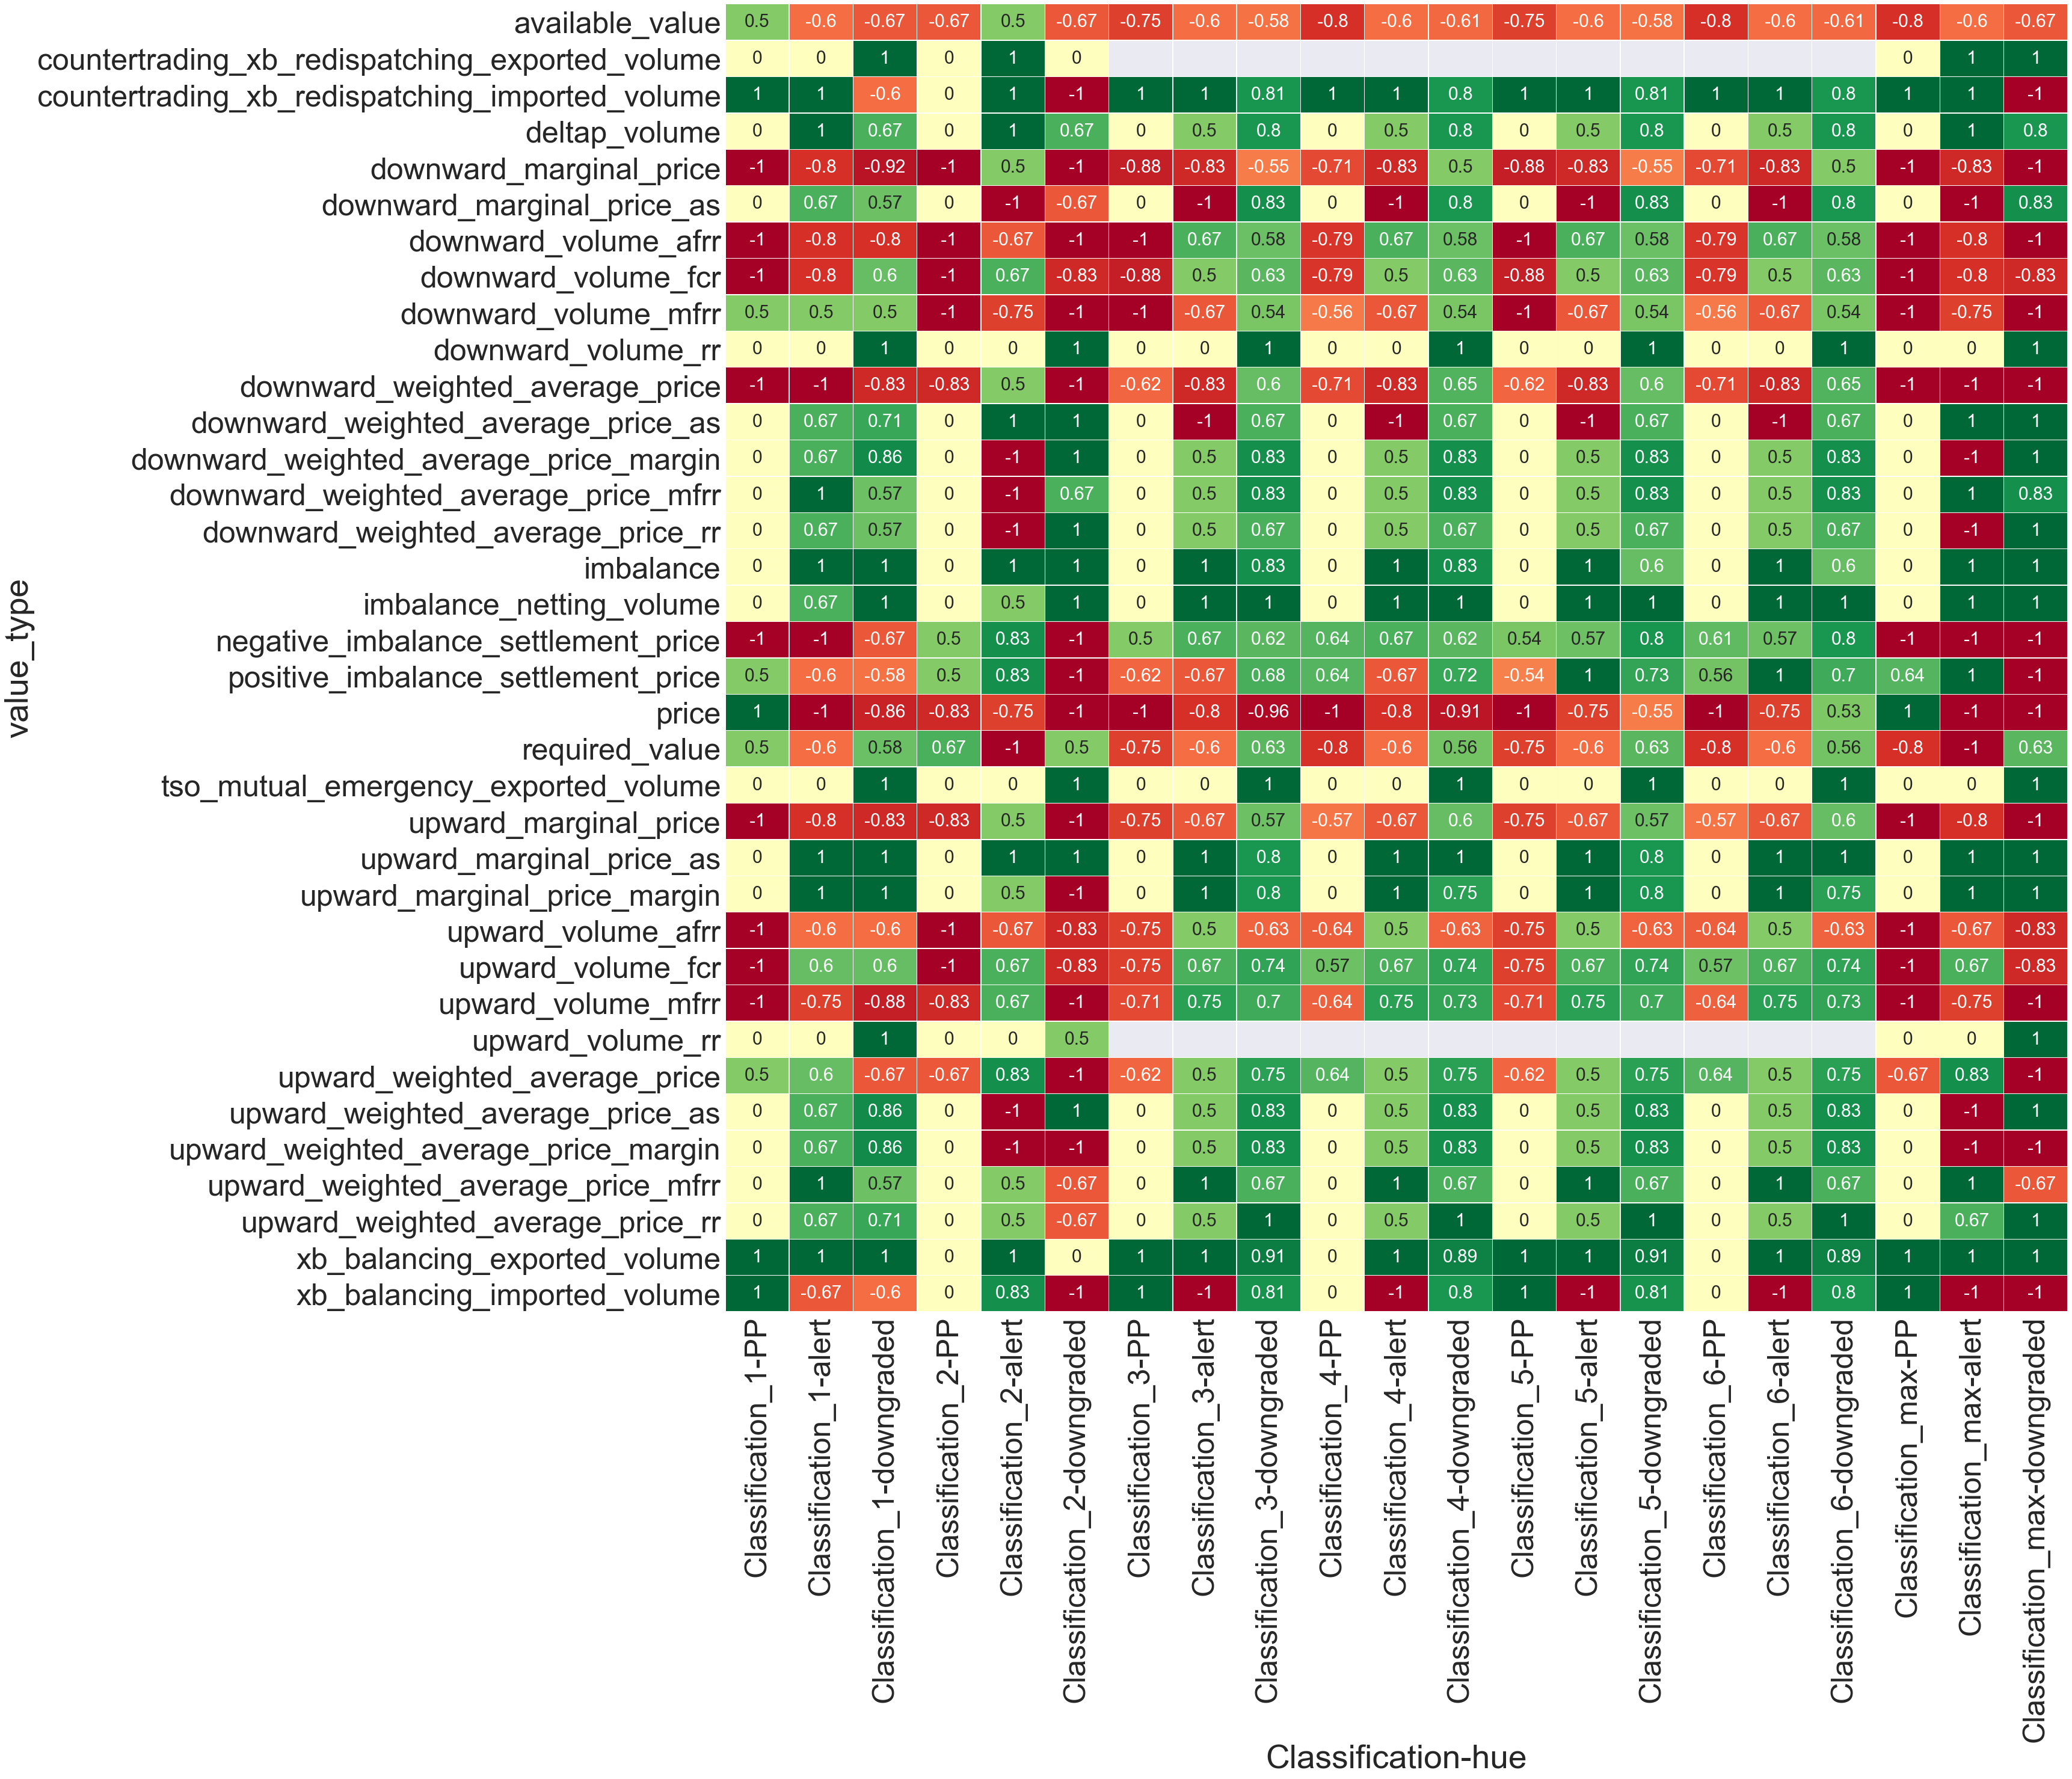

In [34]:
iterables = [['Classification_1','Classification_2','Classification_3','Classification_4',
              'Classification_5','Classification_6','Classification_max'],
            ['PP','downgraded','alert']]
index = pd.MultiIndex.from_product(iterables, names=['Classification', 'Tension'])

method = 'normal_tension'
def getHeatValue(x):
    ratio = 0
    if x.top in ['FAUX', 0]:
        ratio = - x["freq"] / x["count"]
    elif x.top in ['VRAI', 1]:
        ratio =  x["freq"] / x["count"]
    return ratio
big_df = pd.concat(df_dic.values(), keys=df_dic.keys(), )
big_df.index.rename('Classification', level=0,inplace=True)
big_df.ratio = big_df[['freq','count','top']].apply(lambda x: getHeatValue(x), axis=1)

pivot_df = pd.pivot_table(
    big_df[big_df.method == method], 
    values='ratio', 
    index=['value_type'], 
    columns=['Classification', 'hue'])

fig, ax = plt.subplots(figsize=(40,40))
sns.set(font_scale=5)
ax = sns.heatmap(pivot_df , linewidths=.5, cmap="RdYlGn", annot=True, annot_kws={"size": 30}, cbar=False)
plt.show()

In [91]:
c_dic = {
    "Classification_1": ["value_type","month"],
    "Classification_2": ["value_type","plage"],
    "Classification_3": ["value_type","month","plage"],
    "Classification_4": ["value_type","month","plage","bday"],
    "Classification_5": ["value_type","month","plage","direction"],
    "Classification_6": ["value_type","month","plage","bday","direction"]
}

In [ ]:
des_df = pd.pivot_table(
    stu, 
    values='value', 
    index=['start_date', 'quarter','bday','month','resource','direction','PP','alert','downgraded'], 
    columns=['value_type','plage'])

cols = des_df.columns.get_level_values('value_type').unique()
plages = des_df.columns.get_level_values('plage').unique()

fig, ax = plt.subplots(len(cols),len(plages), figsize=(20, 40))

fig.subplots_adjust(hspace=1)
for i in range(len(cols)):
    for j in range(len(plages)):
        if plages[j] in des_df[cols[i]].columns:
            sub_df = des_df[cols[i]][plages[j]].dropna()
            if sub_df.loc[sub_df.index.get_level_values("quarter") == "q1"].empty == False:
                sns.distplot(sub_df[sub_df.index.get_level_values("quarter") == "q1"], color="b", ax=ax[i,j], rug=False, hist=False)
                
            if sub_df[sub_df.index.get_level_values("quarter") == "q2"].empty == False:  
                sns.distplot(sub_df[sub_df.index.get_level_values("quarter") == "q2"], color="g", ax=ax[i,j], rug=False, hist=False)
               
            if sub_df[sub_df.index.get_level_values("quarter") == "q3"].empty == False:
                sns.distplot(sub_df[sub_df.index.get_level_values("quarter") == "q3"], color="y", ax=ax[i,j], rug=False, hist=False)
            if sub_df[sub_df.index.get_level_values("quarter") == "q3"].empty == False:
                sns.distplot(sub_df[sub_df.index.get_level_values("quarter") == "q4"], color="r", ax=ax[i,j], rug=False, hist=False)
            
            
            
            ax[i,j].set_title(cols[i] + " - " + plages[j], fontsize=10)
plt.show()

In [162]:

des_df = pd.pivot_table(
    stu, 
    values='value', 
    index=['start_date','bday','resource','plage','direction','PP','alert','downgraded'], 
    columns=['value_type'])
cols = des_df.columns.get_level_values('value_type').unique()

fig, ax = plt.subplots(len(cols), figsize=(20, 100))

fig.subplots_adjust(hspace=0.30)
for i in range(len(cols)):
    sns.boxplot(x="plage", y=cols[i], hue="bday", data=des_df.reset_index(), orient ="v", ax=ax[i],showfliers=True, order=col_order)
    ax[i].set_title(cols[i], fontsize=20)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'method'

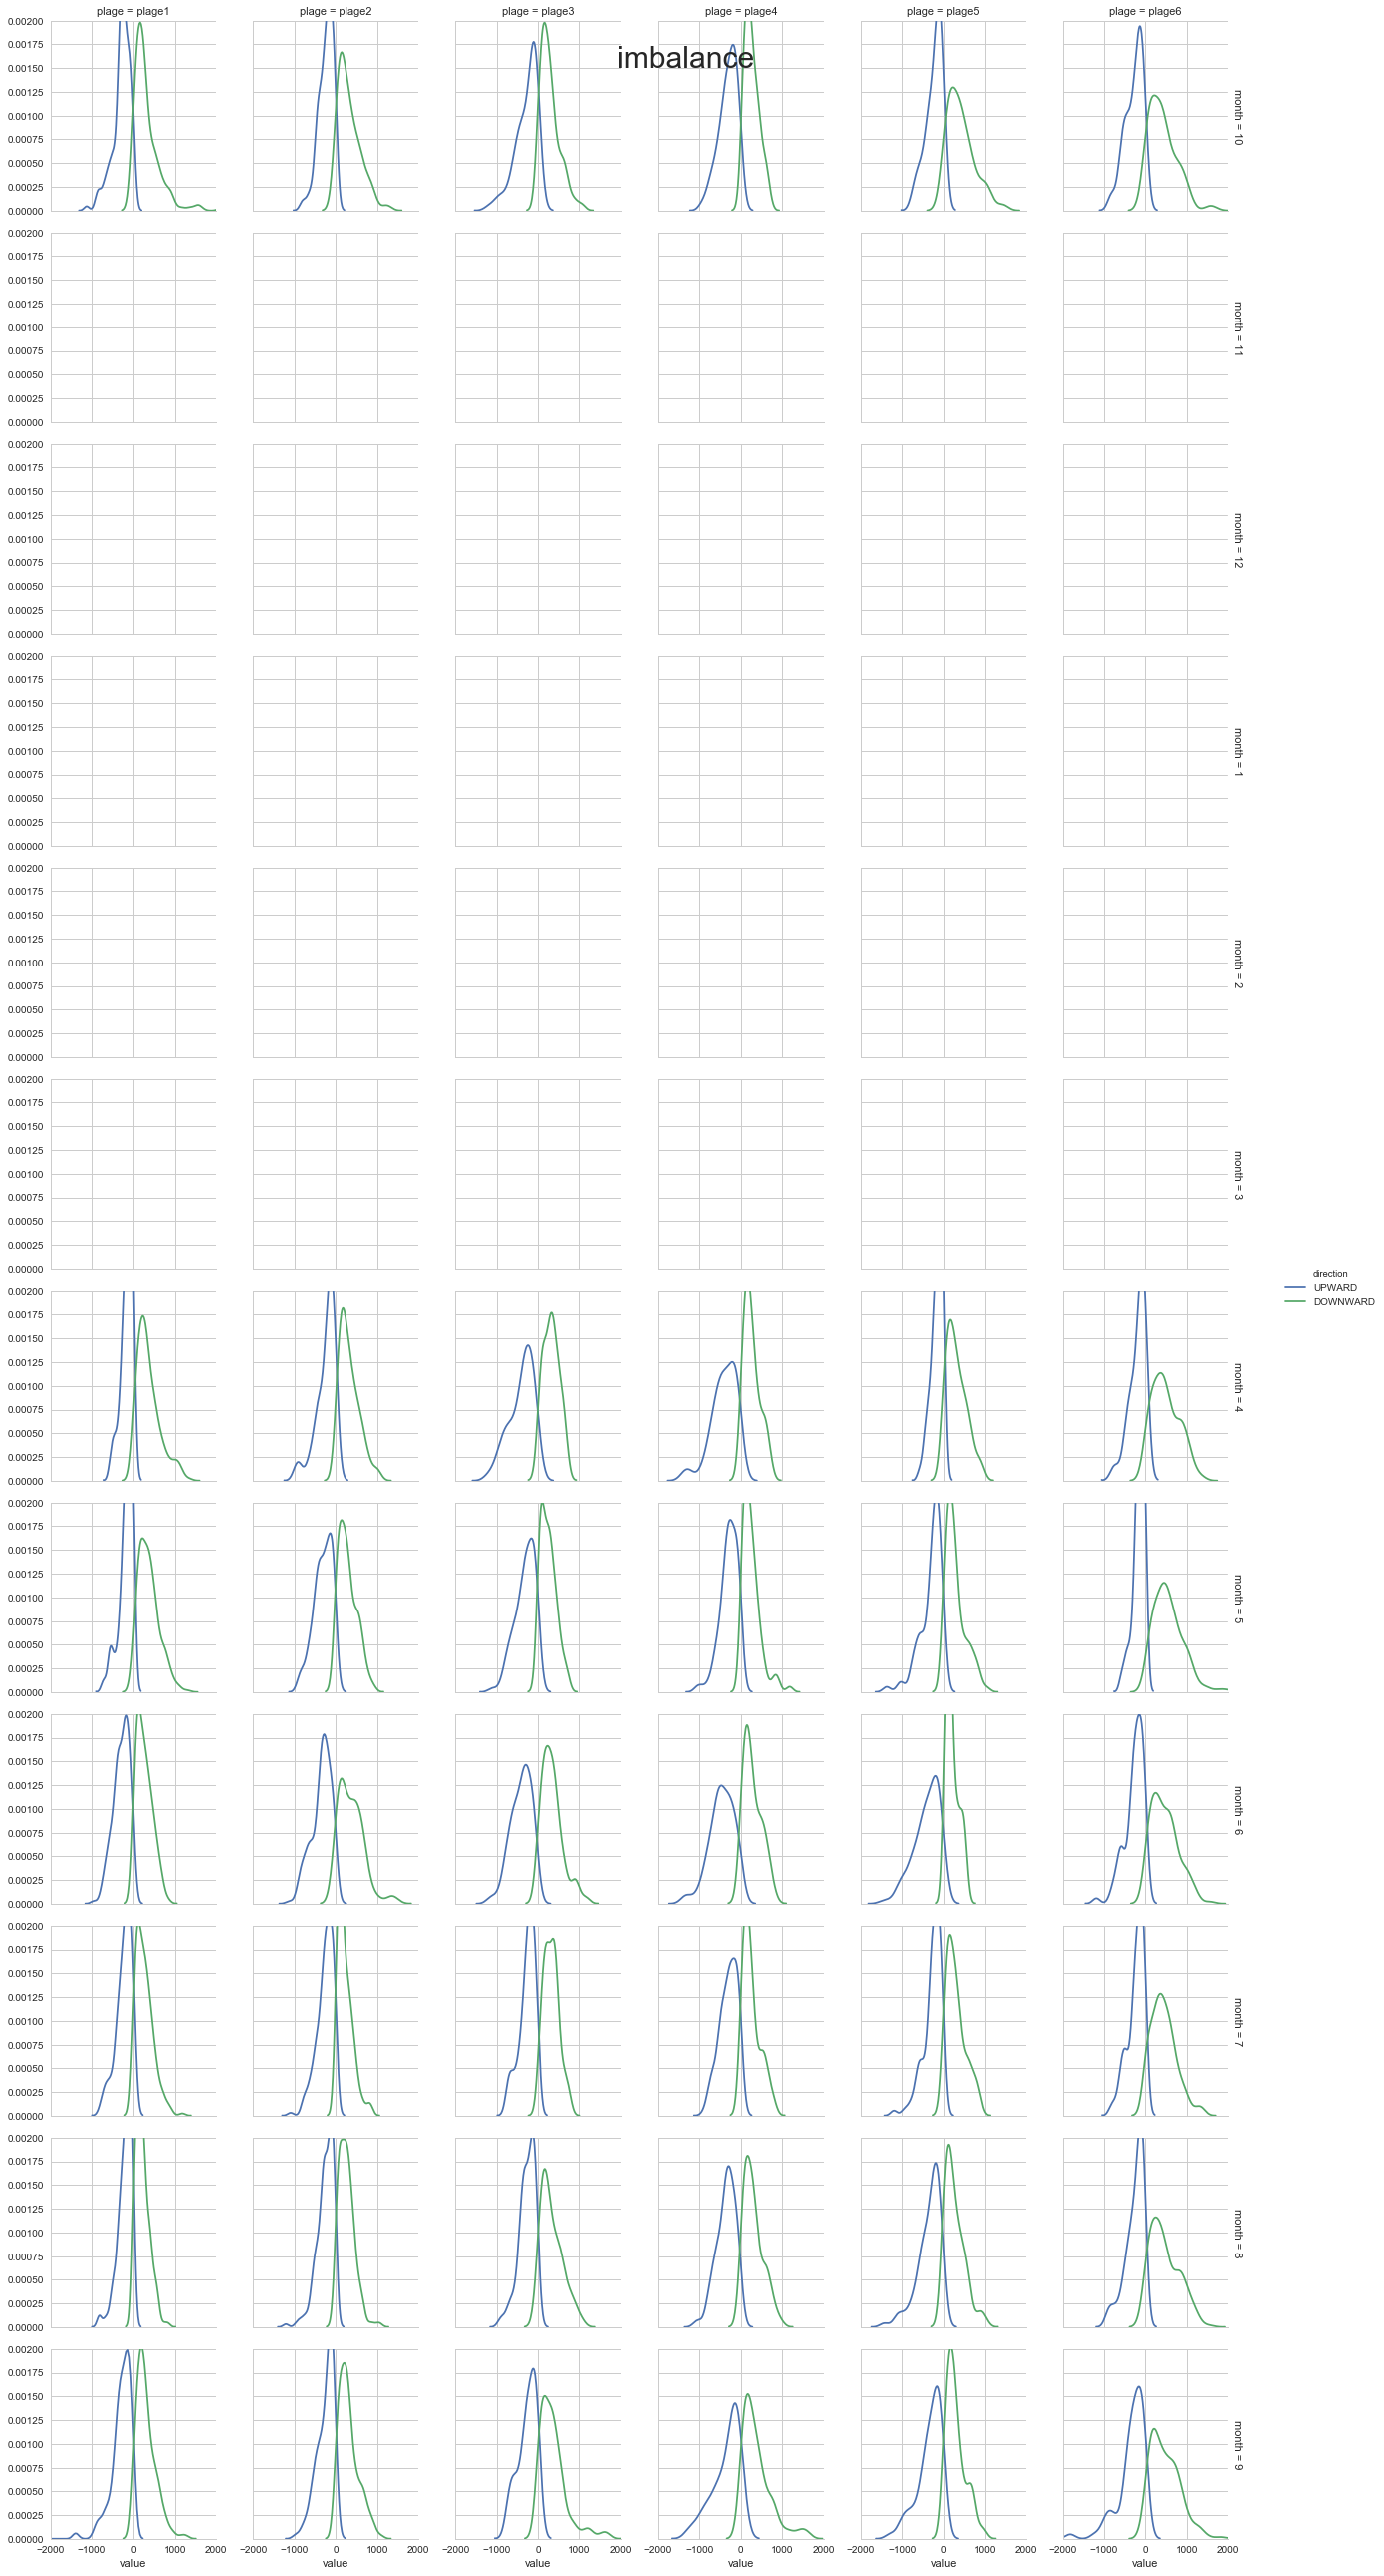

In [20]:
val_type= "imbalance"
row_name = "month"
col_name = "plage"
hue_name = 'direction'
val_name = 'value'

sto = stu.reset_index()
col_order = sorted(set(sto[col_name]))
row_order = [10,11,12,1,2,3,4,5,6,7,8,9]

g = sns.FacetGrid(sto[sto.value_type==val_type], 
                  row=row_name, row_order=row_order,   
                  col=col_name, col_order=col_order,
                  hue=hue_name,
                  margin_titles=True,
                  xlim=(-2000,2000), ylim=(0,.002),
                  dropna=True)

g = g.map(sns.kdeplot, val_name).add_legend()

g.fig.suptitle(val_type, fontsize=30)
plt.show()


In [35]:
fig.savefig(".\Rapports_Etude_MA\Relation_Alert_Prix_MA\Plots\Independance_HeatMap_normal_tension.png", bbox_inches = 'tight')